 Q5. Use Naive bayes, K-nearest, and Decision tree classification algorithms and build classifiers. Divide the data set into training and test set. Compare the accuracy of the different classifiers under the following situations:

5.1 a) Training set = 75% Test set = 25% b) Training set = 66.6% (2/3rd of total), Test set = 33.3%

5.2Training set is chosen by i) hold out method ii) Random subsampling iii) Cross-Validation. Compare the accuracy of the classifiers obtained.

5.3Data is scaled to standard format.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import math
import seaborn as sns

# **Working with Iris dataset**

In [3]:
#importing the data
df=pd.read_csv('iris.csv')
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isna().sum().sum()

0

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
x=df.values[:,:-1]
y=df.values[:,-1]

In [7]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    sns.set(font_scale=1)
    plt.figure(figsize=(10,5))
    labels = [0,1,2]
    # representing A in heatmap format
    cmap1=sns.light_palette("#2ecc71")
    sns.heatmap(C, annot=True, cmap=cmap1, fmt=".0f", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.show()

### **Hold Out Method**

In [8]:
def model_evaluations(X_train,y_train,X_test,y_test,ls):
    nb = GaussianNB()
    knn = KNeighborsClassifier(round(math.sqrt(X_train.shape[0])))
    dt = DecisionTreeClassifier()
    nb.fit(X_train,y_train)
    knn.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    y_pred = nb.predict(X_test)
    ls.append(accuracy_score(y_test,y_pred)*100)
    print(f"\nmodel: Naive bayes \n\t\tAccuracy:{accuracy_score(y_test,y_pred)*100}")
    print(f"\n\t\tPrecision Score:{precision_score(y_test,y_pred,average='macro')*100}")
    print(f"\n\t\tRecall:{recall_score(y_test,y_pred,average='macro')*100}")
    print(f"\n\t\tF1 Score:{f1_score(y_test,y_pred,average='macro')*100}")
    print('\n===========================================================\n')
    print(classification_report(y_pred,y_test))
    print('\n===========================================================\n')
    plot_confusion_matrix(y_test,y_pred)
    y_pred = knn.predict(X_test)
    ls.append(accuracy_score(y_test,y_pred)*100)
    print(f"\n\nmodel: K-Nearest Neighbors \n\t\tAccuracy:{accuracy_score(y_test,y_pred)}")
    print(f"\n\t\tPrecision Score:{precision_score(y_test,y_pred,average='macro')*100}")
    print(f"\n\t\tRecall:{recall_score(y_test,y_pred,average='macro')*100}")
    print(f"\n\t\tF1 Score:{f1_score(y_test,y_pred,average='macro')*100}")
    print('\n===========================================================\n')
    print(classification_report(y_pred,y_test))
    print('\n===========================================================\n')
    plot_confusion_matrix(y_test,y_pred)
    y_pred = dt.predict(X_test)
    ls.append(accuracy_score(y_test,y_pred)*100)
    print(f"\n\nmodel:Decision Tree \n\t\tAccuracy:{accuracy_score(y_test,y_pred)}")
    print(f"\n\t\tPrecision Score:{precision_score(y_test,y_pred,average='macro')*100}")
    print(f"\n\t\tRecall:{recall_score(y_test,y_pred,average='macro')*100}")
    print(f"\n\t\tF1 Score:{f1_score(y_test,y_pred,average='macro')*100}")
    print('\n============================================================\n')
    print(classification_report(y_pred,y_test))
    print('\n============================================================\n')
    plot_confusion_matrix(y_test,y_pred)

a) Training set = 75% Test set = 25%

accuracy score for models with train set = 0.75 and test set = 0.25 

model: Naive bayes 
		Accuracy:100.0

		Precision Score:100.0

		Recall:100.0

		F1 Score:100.0


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38





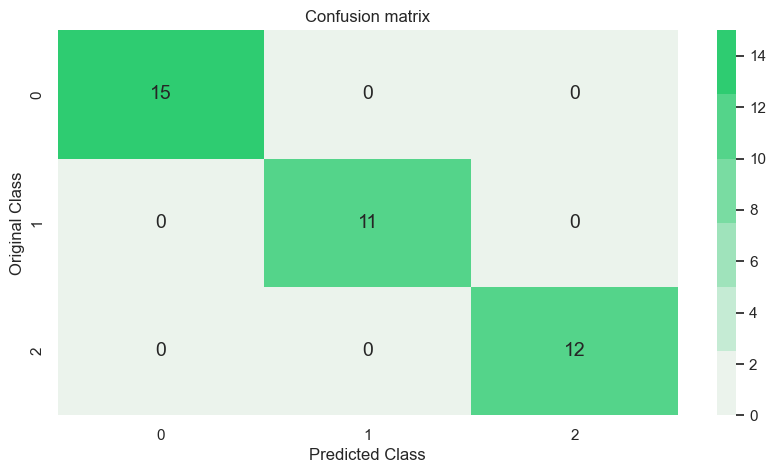



model: K-Nearest Neighbors 
		Accuracy:1.0

		Precision Score:100.0

		Recall:100.0

		F1 Score:100.0


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38





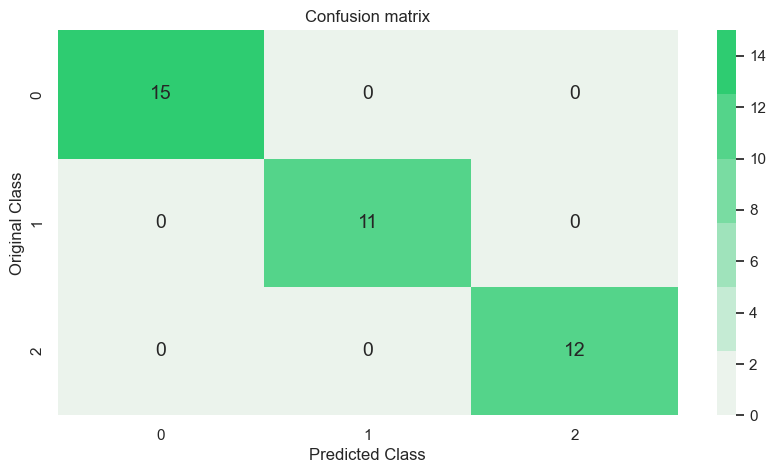



model:Decision Tree 
		Accuracy:1.0

		Precision Score:100.0

		Recall:100.0

		F1 Score:100.0


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38





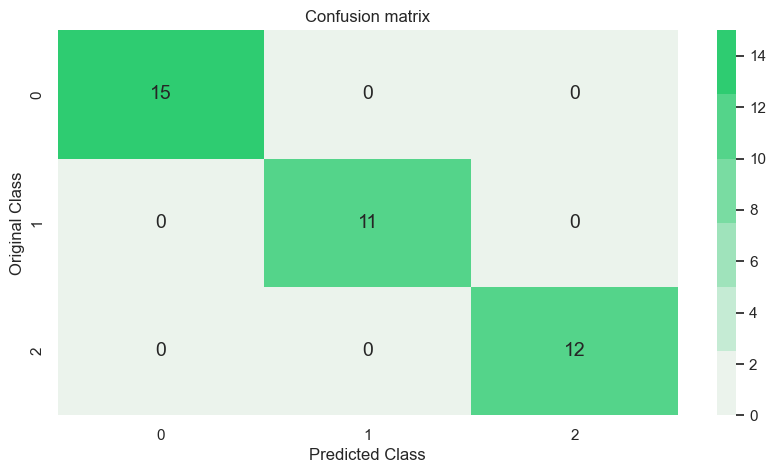

In [9]:
seed = 42
ls1 = []
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=seed)
print("accuracy score for models with train set = 0.75 and test set = 0.25 ")
model_evaluations(X_train, y_train, X_test, y_test,ls1)

b) Training set = 66.6% (2/3rd of total), Test set = 33.3%

accuracy score for models with train set = 0.667 and test set = 0.333 

model: Naive bayes 
		Accuracy:96.0

		Precision Score:95.69444444444444

		Recall:95.69444444444444

		F1 Score:95.69444444444444


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       0.93      0.93      0.93        15
         2.0       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50





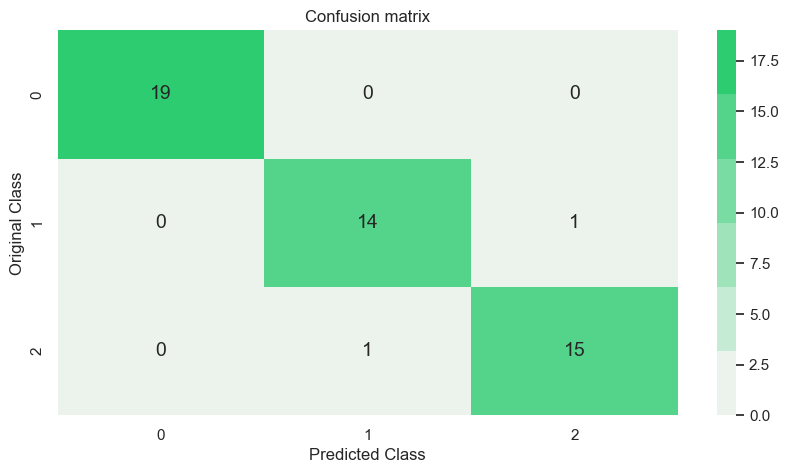



model: K-Nearest Neighbors 
		Accuracy:0.98

		Precision Score:97.91666666666666

		Recall:97.91666666666666

		F1 Score:97.84946236559139


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      0.94      0.97        16
         2.0       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50





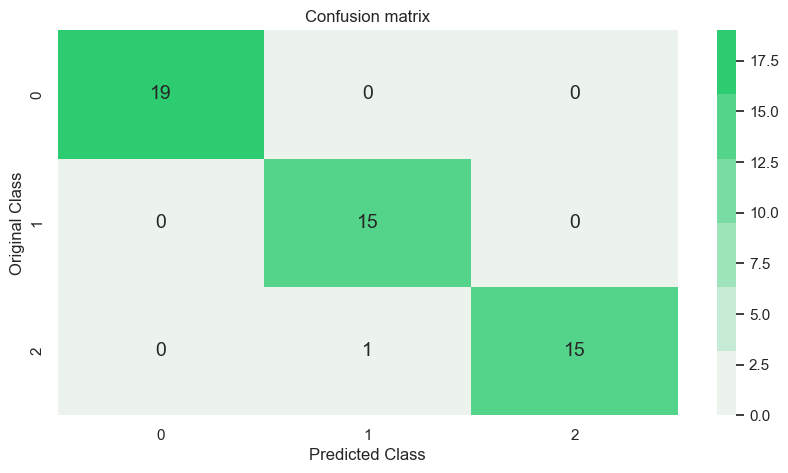



model:Decision Tree 
		Accuracy:0.98

		Precision Score:97.91666666666666

		Recall:97.91666666666666

		F1 Score:97.84946236559139


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      0.94      0.97        16
         2.0       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50





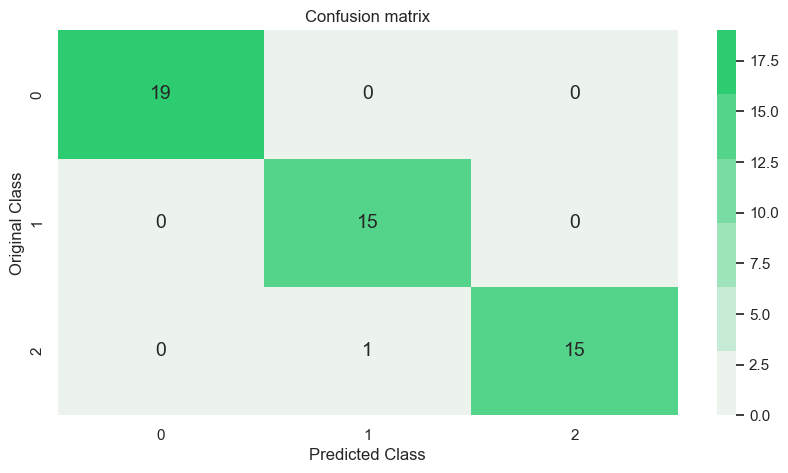

In [10]:
ls2=[]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=seed)
print("accuracy score for models with train set = 0.667 and test set = 0.333 ")
model_evaluations(X_train, y_train, X_test, y_test, ls2)

In [11]:
ls = ['Naive bayes', 'K-Nearest Neighbours','Decision Tree']
dict = {'Accuracy with 75% train and 25% test': ls1, 'Accuracy with 66.6% train and 33.3% test': ls2} 
data = pd.DataFrame(dict,index=ls)
print('Dataframe of accuaracy with different classifiers using hold out method')
data

Dataframe of accuaracy with different classifiers using hold out method


,Accuracy with 75% train and 25% test,Accuracy with 66.6% train and 33.3% test
Naive bayes,100.0,96.0
K-Nearest Neighbours,100.0,98.0
Decision Tree,100.0,98.0


###**Cross-Validation Method**

In [12]:
from sklearn.model_selection import cross_val_score

print('='*35)
print('\nUsing Cross-Validation Method:\n')
print('='*35)
DT = cross_val_score(DecisionTreeClassifier(), x,y )
print("DecisionTree :",DT.mean())

KNN = cross_val_score(KNeighborsClassifier(), x,y )
print("KNeighborsClassifier :",KNN.mean())

NB = cross_val_score(GaussianNB(), x,y)
print("GaussianNB : ",NB.mean())


Using Cross-Validation Method:

DecisionTree : 0.9666666666666668
KNeighborsClassifier : 0.9733333333333334
GaussianNB :  0.9533333333333334


###**Random Subsampling**

In [13]:
rs_results1=list()
rs_results2=list()
rs_results3=list()

In [14]:
def random_subsampling(x_train,y_train,x_test,y_test):
  D=DecisionTreeClassifier()
  nb = GaussianNB()
  knn = KNeighborsClassifier(round(math.sqrt(x_train.shape[0])))
  D.fit(x_train,y_train)
  nb.fit(x_train,y_train)
  knn.fit(x_train,y_train)
  p1=D.predict(x_test)
  p2=nb.predict(x_test)
  p3=knn.predict(x_test)

  rs_results1.append(accuracy_score(y_test,p1))
  rs_results2.append(accuracy_score(y_test,p2))
  rs_results3.append(accuracy_score(y_test,p3))

  print(f"\nmodel: Decision Tree \n\t\tAccuracy:{accuracy_score(y_test,p1)*100}")
  print(f"\n\t\tPrecision Score:{precision_score(y_test,p1,average='macro')*100}")
  print(f"\n\t\tRecall:{recall_score(y_test,p1,average='macro')*100}")
  print(f"\n\t\tF1 Score:{f1_score(y_test,p1,average='macro')*100}")
  print('\n===========================================================\n')
  print('\nConfusion Matrix :')
  print(confusion_matrix(yrs_test,p1))
  print('\n===========================================================\n')
  print(f"\nmodel: Naive bayes \n\t\tAccuracy:{accuracy_score(y_test,p2)*100}")
  print(f"\n\t\tPrecision Score:{precision_score(y_test,p2,average='macro')*100}")
  print(f"\n\t\tRecall:{recall_score(y_test,p2,average='macro')*100}")
  print(f"\n\t\tF1 Score:{f1_score(y_test,p2,average='macro')*100}")
  print('\n===========================================================\n')
  print('\nConfusion Matrix :')
  print(confusion_matrix(yrs_test,p2))
  print('\n===========================================================\n')
  print(f"\nmodel: K-Nearest Neighbours \n\t\tAccuracy:{accuracy_score(y_test,p3)*100}")
  print(f"\n\t\tPrecision Score:{precision_score(y_test,p3,average='macro')*100}")
  print(f"\n\t\tRecall:{recall_score(y_test,p3,average='macro')*100}")
  print(f"\n\t\tF1 Score:{f1_score(y_test,p3,average='macro')*100}")
  print('\n===========================================================\n')
  print('\nConfusion Matrix :')
  print(confusion_matrix(yrs_test,p3))
  print('\n===========================================================\n')

(a) Train size : 75% , test size : 25%

In [15]:
print('\nRandom Subsampling method for train size 75% and test size 25%:\n')

rsna1 = []

for i in range(1,11):
  xrs_train,xrs_test,yrs_train,yrs_test=train_test_split(x,y,test_size=0.25,random_state=i)
  print('For Random state '+str(i)+' : ')
  random_subsampling(xrs_train,yrs_train,xrs_test,yrs_test)

result_ac = np.array(rs_results1)
net_ac = result_ac.sum()/10
print('\nNet Accuracy of Decision Tree = {a} %'.format(a = net_ac*100))
rsna1.append(net_ac*100)
result_ac = np.array(rs_results2)
net_ac = result_ac.sum()/10
print('\nNet Accuracy of Naive Bayes = {a} %'.format(a = net_ac*100))
rsna1.append(net_ac*100)
result_ac = np.array(rs_results3)
net_ac = result_ac.sum()/10
print('\nNet Accuracy of K-Nearest Neighbours = {a} %'.format(a = net_ac*100))
rsna1.append(net_ac*100)


Random Subsampling method for train size 75% and test size 25%:

For Random state 1 : 

model: Decision Tree 
		Accuracy:97.36842105263158

		Precision Score:96.66666666666667

		Recall:97.91666666666666

		F1 Score:97.17034521788342



Confusion Matrix :
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]



model: Naive bayes 
		Accuracy:97.36842105263158

		Precision Score:96.66666666666667

		Recall:97.91666666666666

		F1 Score:97.17034521788342



Confusion Matrix :
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]



model: K-Nearest Neighbours 
		Accuracy:97.36842105263158

		Precision Score:96.66666666666667

		Recall:97.91666666666666

		F1 Score:97.17034521788342



Confusion Matrix :
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


For Random state 2 : 

model: Decision Tree 
		Accuracy:94.73684210526315

		Precision Score:93.93939393939394

		Recall:93.93939393939394

		F1 Score:93.93939393939394



Confusion Matrix :
[[16  0  0]
 [ 0 10  1]
 [ 0  1 10]]



model: Naive bayes 
		Accuracy:97.36842105263158

		

(b) Train size : 66.6% , test size : 33.3%

In [16]:
rs_results1=list()
rs_results2=list()
rs_results3=list()

In [17]:
print('\nRandom Subsampling method for train size 66.6% and test size 33.3%:\n')

rsna2 = []

for i in range(1,11):
  xrs_train,xrs_test,yrs_train,yrs_test=train_test_split(x,y,test_size=0.33,random_state=i)
  print('For Random state '+str(i)+' : ')
  random_subsampling(xrs_train,yrs_train,xrs_test,yrs_test)

result_ac = np.array(rs_results1)
net_ac = result_ac.sum()/10
print('\nNet Accuracy of Decision Tree = {a} %'.format(a = net_ac*100))
rsna2.append(net_ac*100)
result_ac = np.array(rs_results2)
net_ac = result_ac.sum()/10
print('\nNet Accuracy of Naive Bayes = {a} %'.format(a = net_ac*100))
rsna2.append(net_ac*100)
result_ac = np.array(rs_results3)
net_ac = result_ac.sum()/10
print('\nNet Accuracy of K-Nearest Neighbours = {a} %'.format(a = net_ac*100))
rsna2.append(net_ac*100)


Random Subsampling method for train size 66.6% and test size 33.3%:

For Random state 1 : 

model: Decision Tree 
		Accuracy:96.0

		Precision Score:95.86466165413533

		Recall:95.86466165413533

		F1 Score:95.86466165413533



Confusion Matrix :
[[17  0  0]
 [ 0 18  1]
 [ 0  1 13]]



model: Naive bayes 
		Accuracy:94.0

		Precision Score:93.7037037037037

		Recall:94.11027568922306

		F1 Score:93.84902143522834



Confusion Matrix :
[[17  0  0]
 [ 0 17  2]
 [ 0  1 13]]



model: K-Nearest Neighbours 
		Accuracy:98.0

		Precision Score:97.77777777777779

		Recall:98.24561403508771

		F1 Score:97.94967381174277



Confusion Matrix :
[[17  0  0]
 [ 0 18  1]
 [ 0  0 14]]


For Random state 2 : 

model: Decision Tree 
		Accuracy:96.0

		Precision Score:95.53571428571429

		Recall:95.53571428571429

		F1 Score:95.53571428571429



Confusion Matrix :
[[20  0  0]
 [ 0 15  1]
 [ 0  1 13]]



model: Naive bayes 
		Accuracy:96.0

		Precision Score:95.53571428571429

		Recall:95.53571428571429


In [18]:
ls = ['Decision Tree','Naive bayes', 'K-Nearest Neighbours']
dict = {'Accuracy with 75% train and 25% test': rsna1, 'Accuracy with 66.6% train and 33.3% test': rsna2} 
data = pd.DataFrame(dict,index=ls)
print('Dataframe of accuaracy with different classifiers using Random Subsampling method')
data

Dataframe of accuaracy with different classifiers using Random Subsampling method


,Accuracy with 75% train and 25% test,Accuracy with 66.6% train and 33.3% test
Decision Tree,95.263158,94.6
Naive bayes,94.736842,94.8
K-Nearest Neighbours,96.315789,97.2


### **Standardizing the data**

In [19]:
df.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [20]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
ss = StandardScaler()
X = ss.fit_transform(X)

accuracy score for models with train set = 0.75 and test set = 0.25 and all the data is standardized

model: Naive bayes 
		Accuracy:100.0

		Precision Score:100.0

		Recall:100.0

		F1 Score:100.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38





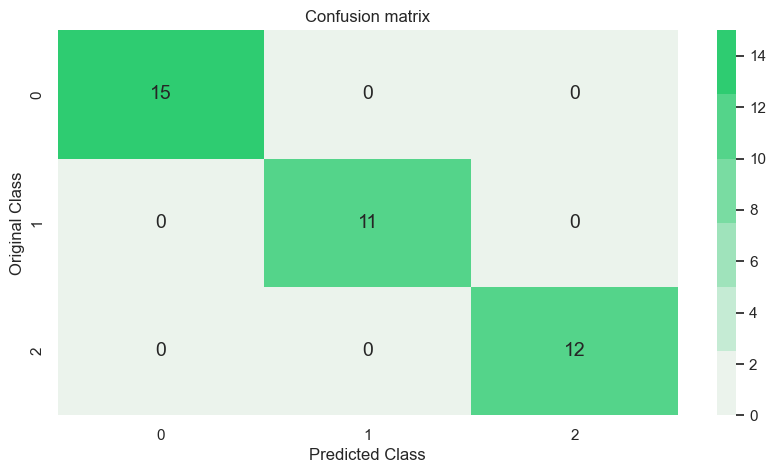



model: K-Nearest Neighbors 
		Accuracy:1.0

		Precision Score:100.0

		Recall:100.0

		F1 Score:100.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38





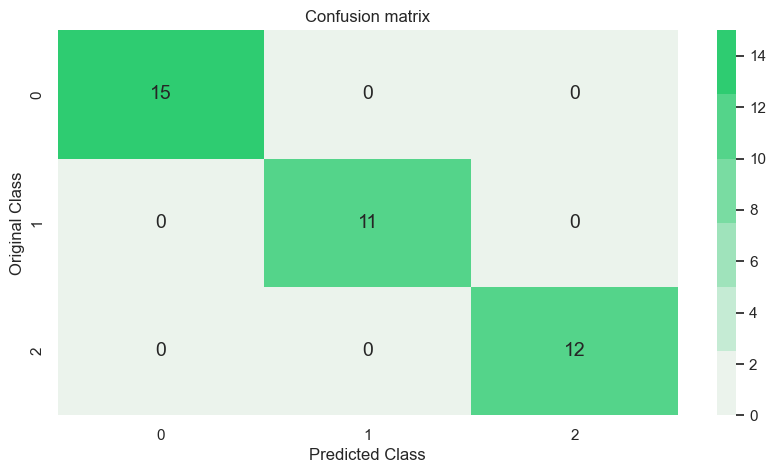



model:Decision Tree 
		Accuracy:1.0

		Precision Score:100.0

		Recall:100.0

		F1 Score:100.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38





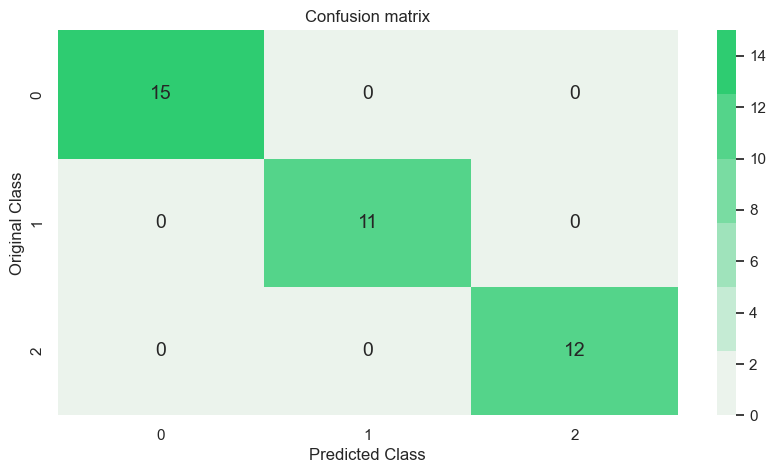

In [21]:
seed = 42
stand_ls=[]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=seed)
print("accuracy score for models with train set = 0.75 and test set = 0.25 and all the data is standardized")
model_evaluations(X_train, y_train, X_test, y_test, stand_ls)

In [22]:
ls = ['Naive bayes', 'K-Nearest Neighbours','Decision Tree']
dict = {'Accuracy': stand_ls} 
data = pd.DataFrame(dict,index=ls)
print('Dataframe of accuaracy with different classifiers after Standarization')
data

Dataframe of accuaracy with different classifiers after Standarization


,Accuracy
Naive bayes,100.0
K-Nearest Neighbours,100.0
Decision Tree,100.0
